In [3]:
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import dask.array as da
import dask.bag as db
import skimage

In [7]:
img = skimage.io.imread('/gpfs/commons/home/jsingh/outputs/masks_final.tiff')

In [8]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [9]:
#using region props:
ski_img = skimage.measure.regionprops(img)

In [10]:
import pandas as pd
df = pd.DataFrame(ski_img)

In [11]:
ski_img[1].centroid

(467.35601458080197, 4564.8080194410695)

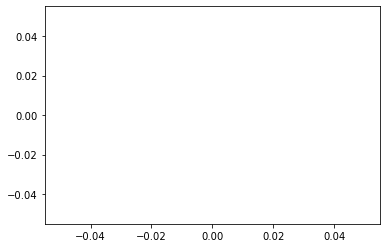

In [12]:
plt.scatter(x_coord, y_coord)

In [17]:
import pandas as pd
import anndata as ad
ad_object = return_anndata('/gpfs/commons/home/jsingh/outputs/masks_final.tiff')

/gpfs/commons/home/jsingh/.conda/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:875: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")
/gpfs/commons/home/jsingh/.conda/envs/spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:801: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [18]:
mat = ad_object.uns['centroid']

In [19]:
adata = ad_object

In [20]:
# Centroid Distance Matrix
x_coord = []
y_coord = []
for x in range(np.shape(adata.uns['centroid'])[0]):
    y_coord.append(adata.uns['centroid'][x][0])
    x_coord.append(adata.uns['centroid'][x][1])
    

In [25]:
mat = np.column_stack((x_coord, y_coord))

In [26]:
mat

array([[ 4564.80801944,   467.35601458],
       [ 5238.48125   ,   846.36875   ],
       [ 6657.84745763,   946.89830508],
       ...,
       [ 8441.20718816,  9064.13953488],
       [ 6809.3253012 ,  9536.42168675],
       [  318.2300885 , 10463.26548673]])

In [27]:
point_list = []
from shapely.geometry import Point
for s in mat:
    point_list.append(Point(s))

In [28]:
import geopandas
d = {'geometry': point_list}
gdf = geopandas.GeoDataFrame(d,crs="EPSG:4326")

/gpfs/commons/home/jsingh/.conda/envs/spatial/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [29]:
point_list[1:]

 ...]

In [31]:
from libpysal import weights, examples
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# read in example data

In [32]:
## 3-nearest neighbor graph, meaning that points are connected
## to the three closest other points. This means every point
## will have exactly three neighbors.
knn3 = weights.KNN.from_dataframe(gdf, k=3)

/gpfs/commons/home/jsingh/.conda/envs/spatial/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 30 disconnected components.
  warnings.warn(message)


In [33]:
knn_graph = knn3.to_networkx()

In [34]:
positions = dict(zip(knn_graph.nodes, mat))

In [35]:
positions

{0: array([4564.80801944,  467.35601458]),
 1: array([5238.48125,  846.36875]),
 2: array([6657.84745763,  946.89830508]),
 3: array([7597.05221519, 1153.40822785]),
 4: array([7588.83433735, 1177.70180723]),
 5: array([7921.04109589, 1174.02054795]),
 6: array([9797.30359937, 1189.22535211]),
 7: array([7313.56651376, 1254.43348624]),
 8: array([7710.84883721, 1260.17635659]),
 9: array([7808.59401709, 1266.01282051]),
 10: array([8750.7653277 , 1270.24947146]),
 11: array([7206.78823529, 1268.68235294]),
 12: array([7192.6937355 , 1286.30394432]),
 13: array([7253.10493827, 1282.65123457]),
 14: array([8265.28220859, 1287.54601227]),
 15: array([6906.06870229, 1289.28244275]),
 16: array([8069.64971751, 1294.02824859]),
 17: array([6920.67213115, 1294.39344262]),
 18: array([7823.8490566 , 1301.22955975]),
 19: array([6931.45833333, 1297.29166667]),
 20: array([8007.01724138, 1300.01915709]),
 21: array([7695.23348018, 1307.25550661]),
 22: array([8619.15101289, 1326.69244936]),
 23:

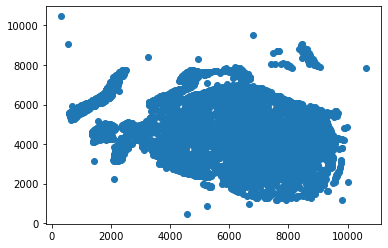

In [36]:
import matplotlib.pyplot as plt
plt.scatter(x_coord, y_coord)

In [ ]:
import networkx
networkx.draw(knn_graph, positions, node_size= 2)

In [ ]:
#convert centroids to geodataframe 

In [ ]:
from libpysal import weights, examples
from contextily import add_basemap
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import geopandas

# read in example data from a geopackage file. Geopackages
# are a format for storing geographic data that is backed
# by sqlite. geopandas reads data relying on the fiona package,
# providing a high-level pandas-style interface to geographic data.
cases = geopandas.read_file("cholera_cases.gpkg")

# construct the array of coordinates for the centroid
coordinates = np.column_stack((cases.geometry.x, cases.geometry.y))

# construct two different kinds of graphs:

## 3-nearest neighbor graph, meaning that points are connected
## to the three closest other points. This means every point
## will have exactly three neighbors.
knn3 = weights.KNN.from_dataframe(cases, k=3)

## The 50-meter distance band graph will connect all pairs of points
## that are within 50 meters from one another. This means that points
## may have different numbers of neighbors.
dist = weights.DistanceBand.from_array(coordinates, threshold=50)

# Then, we can convert the graph to networkx object using the
# .to_networkx() method.
knn_graph = knn3.to_networkx()
dist_graph = dist.to_networkx()

# To plot with networkx, we need to merge the nodes back to
# their positions in order to plot in networkx
positions = dict(zip(knn_graph.nodes, coordinates))

# plot with a nice basemap
f, ax = plt.subplots(1, 2, figsize=(8, 4))
for i, facet in enumerate(ax):
    cases.plot(marker=".", color="orangered", ax=facet)
    add_basemap(facet)
    facet.set_title(("KNN-3", "50-meter Distance Band")[i])
    facet.axis("off")
nx.draw(knn_graph, positions, ax=ax[0], node_size=5, node_color="b")
nx.draw(dist_graph, positions, ax=ax[1], node_size=5, node_color="b")
plt.show()

In [ ]:
#### make graph from adjaceny matrix












